In [16]:
%matplotlib inline
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import datetime
from os import listdir
from os.path import isfile, join

import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
    
# Set up our R namespaces
R = rpy2.robjects.r
DTW = importr('dtw')

child_path = '../kaldi/egs/palak/feature/'
teacher_path = '../kaldi/egs/palak/feature/'
# child_path = '../data/children/Bunty_And_Bubbly_0_sent/features/1.feat'
# teacher_path = '../data/teacher_downsampled/Bunty_And_Bubbly_0_sent/features/1.feat'
title = 'Bunty_And_Bubbly_0_sent0'

child = np.loadtxt(child_path)
teacher = np.loadtxt(teacher_path)
avg_segment = (np.shape(child)[0] + np.shape(teacher)[0])/2
print(np.shape(child), np.shape(teacher))

ValueError: could not convert string to float: b'1_0_0_0_0_0_0_0'

In [12]:
featdist, path = fastdtw(child, teacher, dist=euclidean)
# path distance
c = np.array([i[0] for i in path ])
t = np.array([i[1] for i in path ])
diff = np.absolute(c - t)
pathdist = euclidean(c, t)
print(title + "(" + str(avg_segment) + ") - feature dist: " + str(featdist) + ", path dist: " + str(pathdist) + " max dev. " + str(np.max(diff)))



Bunty_And_Bubbly_0_sent0(648.5) - feature dist: 141.421355434851, path dist: 2321.00689357 max dev. 107


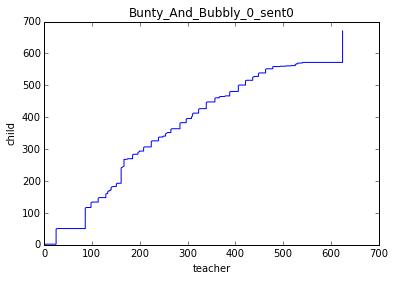

In [13]:
# plot
plt.xlabel('teacher')
plt.ylabel('child')
plt.title(title)
plt.plot(t, c)
# plt.savefig('../results/plots/' + title + '.png', bbox_inches='tight')
# plt.clf()
# add timestamp to it
# fstats.write(title + "\t" + str(avg_segment) + "\t" + str(featdist) + "\t" + str(pathdist) + 't' + str(np.max(diff)) + '\n')
# np.savetxt('../results/paths/' + title + '.path', path)

In [14]:
# dtw
dist, acc, cost, path = dtw(child, teacher, dist=euclidean)

c,t = path[0], path[1]
pathdist = euclidean(c, t)
print ("feature", dist,"path", pathdist)

feature 0.0850490802333 path 1001.4204911


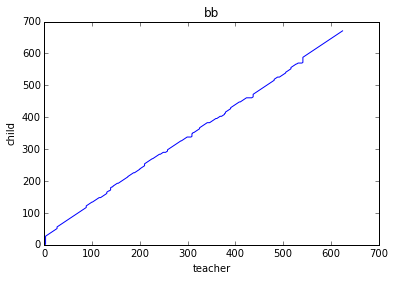

In [15]:

# diff = c - t

# for i in range(len(diff)):
#     if diff[i] > avg_segment/4:
#         print (i, diff[i])

plt.xlabel('teacher')
plt.ylabel('child')
plt.title('bb')
# plt.imshow(acc.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(t, c, 'b')

In [17]:
# Calculate the alignment vector and corresponding distance
# R.dtw?

def window(i, j):
    if abs(i - j) > 100:
        return False
    return True

alignment = R.dtw(child, teacher, windowSize=40, windowType='slantedband')
path1 = np.array(alignment.rx('index1')[0])
path2 = np.array(alignment.rx('index2')[0])
jmin = alignment.rx('jmin')[0][0]
dist = alignment.rx('distance')[0][0]
pathdist = euclidean(path1, path2)
print("feat dist", dist, "path dist", pathdist, 'jmin', jmin)

feat dist 6802.628469106378 path dist 3711.924298797054 jmin 471


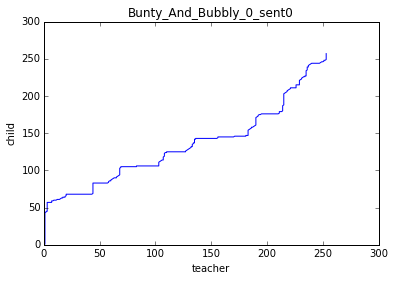

In [14]:
# dtwWindow.plot?
# R.dtwPlot(alignment, type="alignment")
plt.xlabel('teacher')
plt.ylabel('child')
plt.title(title)
# plt.imshow(acc.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path2, path1, 'b') # check which is which